In [1]:
#Import all the necessary libraries 
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ('Downloads/Machine Learning 1/Redwine+Quality.csv') 

In [3]:
df.head(10) 

,Unnamed: 0,Tartaric Acid,Grape Density,Citric Acid,Residual.sugar,Sodium chloride,Free.sulfur.dioxide,Bound.sulfur.dioxide,Alcohol Density,PH Levels,Potassium chloride,Alcohol Content
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,6,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,8,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,9,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,10,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tartaric Acid         1599 non-null   float64
 1   Grape Density         1599 non-null   float64
 2   Citric Acid           1599 non-null   float64
 3   Residual.sugar        1599 non-null   float64
 4   Sodium chloride       1599 non-null   float64
 5   Free.sulfur.dioxide   1599 non-null   float64
 6   Bound.sulfur.dioxide  1599 non-null   float64
 7   Alcohol Density       1599 non-null   float64
 8   PH Levels             1599 non-null   float64
 9   Potassium chloride    1599 non-null   float64
 10  Alcohol Content       1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


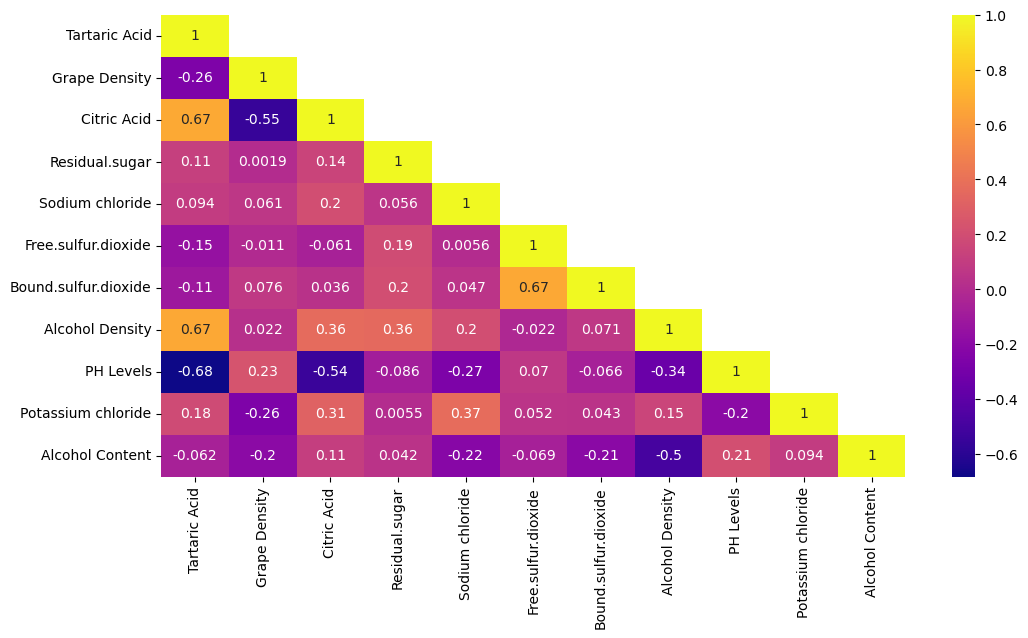

In [8]:
plt.figure(figsize=(12,6)) 
sns.heatmap(df.corr(),cmap='plasma',fmt='.2g',annot=True,mask=np.triu(df.corr(),+1)) 
plt.show()

In [9]:
from scipy.stats import zscore 
data_scaled=df.apply(zscore) 
data_scaled.head() 

,Tartaric Acid,Grape Density,Citric Acid,Residual.sugar,Sodium chloride,Free.sulfur.dioxide,Bound.sulfur.dioxide,Alcohol Density,PH Levels,Potassium chloride,Alcohol Content
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [10]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=6, random_state=123) 
pca_transformed = pca.fit_transform(data_scaled)

In [11]:
pca_transformed

array([[-1.61952988,  0.45095009, -1.77445415,  0.04374031,  0.06701448,
        -0.91392069],
       [-0.79916993,  1.85655306, -0.91169017,  0.54806597, -0.01839156,
         0.92971392],
       [-0.74847909,  0.88203886, -1.17139423,  0.41102067, -0.04353101,
         0.40147313],
       ...,
       [-1.45612897,  0.31174559,  1.12423941,  0.49187676,  0.19371564,
        -0.50640956],
       [-2.27051793,  0.97979111,  0.62796456,  0.63977007,  0.06773549,
        -0.86040762],
       [-0.42697475, -0.53669021,  1.6289552 , -0.39171595,  0.45048209,
        -0.49615364]])

In [12]:
pca.components_ 

array([[ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
        -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
        -0.11323207],
       [-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
         0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
        -0.38618096],
       [-0.12330157, -0.44996253,  0.23824707,  0.10128338, -0.09261383,
         0.42879287,  0.3224145 , -0.33887135,  0.05769735,  0.27978615,
         0.47167322],
       [-0.22961737,  0.07895978, -0.07941826, -0.37279256,  0.66619476,
        -0.04353782, -0.03457712, -0.17449976, -0.00378775,  0.55087236,
        -0.12218109],
       [-0.08261366,  0.21873452, -0.05857268,  0.73214429,  0.2465009 ,
        -0.15915198, -0.22246456,  0.15707671,  0.26752977,  0.22596222,
         0.35068141],
       [ 0.10147858,  0.41144893,  0.06959338,  0.04915555,  0.30433857,
        -0.01400021,  0.13630755, -0.3911523 , -0.52211645, -0.38126343,
         0.361

In [13]:
pca.explained_variance_ 

array([3.10107182, 1.92711489, 1.55151379, 1.21399175, 0.95989238,
       0.66002104])

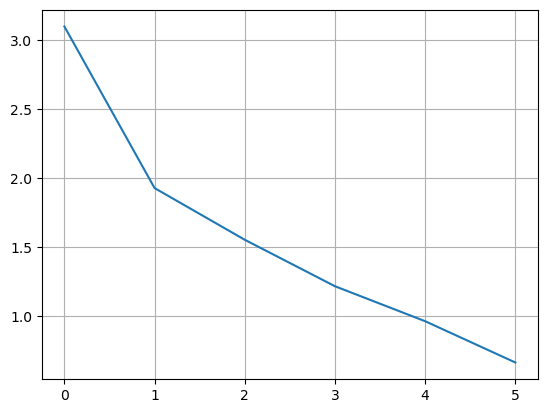

In [14]:
plt.plot(pca.explained_variance_) 
plt.grid()

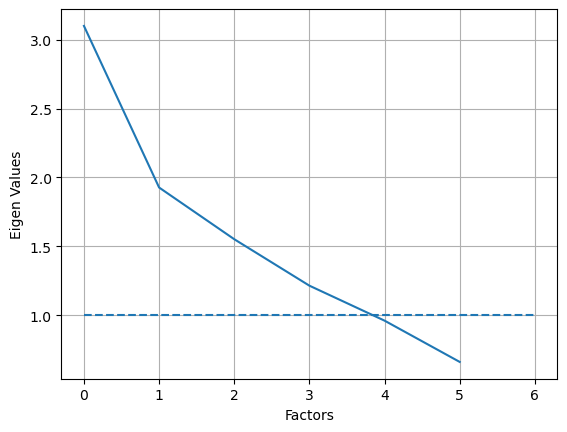

In [15]:
 plt.plot(range(0,6),pca.explained_variance_) 
plt.grid() 
plt.ylabel('Eigen Values') 
plt.xlabel('Factors') 
plt.hlines(y=1,xmin=0,xmax=6,linestyles='dashed'); 

In [16]:
pca.explained_variance_ratio_ 

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439])

In [32]:
# Define the matrix 'a'
a = np.arange(10, 26).reshape(4, 4)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(a)

# Eigenvalues
print("Eigenvalues:", eigenvalues)

# Since you need the first two eigenvalues
first_two_eigenvalues = eigenvalues[:2]
print("First two eigenvalues:", first_two_eigenvalues)


Eigenvalues: [ 7.11247837e+01 -1.12478374e+00 -5.34821706e-15 -1.66225176e-16]
First two eigenvalues: [71.12478374 -1.12478374]


In [88]:
df1 = pd.read_csv('Downloads/Machine Learning 1/Smoking.csv')

In [89]:
df1.head(5)

,ID,age,height(cm),weight(kg),eyesight(left),eyesight(right),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,smoking
0,0,40,155,60,1.2,1.0,114,94,215,82,73,126,12.9,0.7,0
1,1,40,160,60,0.8,0.6,119,130,192,115,42,127,12.7,0.6,0
2,2,55,170,60,0.8,0.8,138,89,242,182,55,151,15.8,1.0,1
3,3,40,165,70,1.5,1.5,100,96,322,254,45,226,14.7,1.0,0
4,4,40,155,60,1.0,1.0,120,80,184,74,62,107,12.5,0.6,0


In [90]:
df1.drop(['ID','smoking'],axis=1,inplace=True)

In [91]:
df1.shape

(469, 13)

In [92]:
df1.head()

,age,height(cm),weight(kg),eyesight(left),eyesight(right),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine
0,40,155,60,1.2,1.0,114,94,215,82,73,126,12.9,0.7
1,40,160,60,0.8,0.6,119,130,192,115,42,127,12.7,0.6
2,55,170,60,0.8,0.8,138,89,242,182,55,151,15.8,1.0
3,40,165,70,1.5,1.5,100,96,322,254,45,226,14.7,1.0
4,40,155,60,1.0,1.0,120,80,184,74,62,107,12.5,0.6


In [93]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  469 non-null    int64  
 1   height(cm)           469 non-null    int64  
 2   weight(kg)           469 non-null    int64  
 3   eyesight(left)       469 non-null    float64
 4   eyesight(right)      469 non-null    float64
 5   systolic             469 non-null    int64  
 6   fasting blood sugar  469 non-null    int64  
 7   Cholesterol          469 non-null    int64  
 8   triglyceride         469 non-null    int64  
 9   HDL                  469 non-null    int64  
 10  LDL                  469 non-null    int64  
 11  hemoglobin           469 non-null    float64
 12  serum creatinine     469 non-null    float64
dtypes: float64(4), int64(9)
memory usage: 47.8 KB


In [81]:
# Calculate the standard deviation before normalization
std_dev_before = df1['systolic'].std()

# Perform Z-score normalization
df1['systolic_normalized'] = (df1['systolic'] - df1['systolic'].mean()) / df1['systolic'].std()

# The standard deviation after normalization will be 1, but let's calculate to confirm
std_dev_after = df1['systolic_normalized'].std()

print(f"Standard Deviation before normalization: {std_dev_before}")
print(f"Standard Deviation after normalization: {std_dev_after}")

Standard Deviation before normalization: 13.761920179692876
Standard Deviation after normalization: 1.0000000000000002


In [96]:
# Standardize the features
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

# Apply PCA
pca = PCA(n_components=8, random_state=42)
pca.fit(df1_scaled)

# Eigenvector of the 4th principal component
eigenvector_4th = pca.components_[3]
print("Eigenvector of the 4th principal component:", eigenvector_4th)

Eigenvector of the 4th principal component: [ 0.06575939 -0.25025168 -0.09155151  0.63711993  0.53505129  0.1213242
  0.10772303  0.05313852  0.24458797 -0.21017278  0.05237981 -0.20962859
 -0.22942373]


In [94]:
scaler = StandardScaler()
df1_normalized = scaler.fit_transform(df1)

# Apply PCA
pca = PCA(n_components=8, random_state=42)
pca.fit(df1_normalized)

# Eigenvalues
eigenvalues = pca.explained_variance_

In [95]:
eigenvalues

array([3.39222588, 2.02584222, 1.48029305, 1.13993914, 0.9515798 ,
       0.86285752, 0.76984545, 0.70508037])

In [97]:
# Normalize the dataset
scaler = StandardScaler()
df1_normalized = scaler.fit_transform(df1)

# Apply PCA
pca = PCA(n_components=8, random_state=42)
pca.fit(df1_normalized)

# Get the explained variance ratio of the principal components
explained_variances = pca.explained_variance_ratio_
print("Explained variances in correct order:", explained_variances)

Explained variances in correct order: [0.26038408 0.15550175 0.11362591 0.08750066 0.07304237 0.06623213
 0.05909261 0.05412131]
